<a href="https://colab.research.google.com/github/Kondaveetigayathri/AP20110010568-CSL/blob/main/MAJOR_PROJECT_CORIZO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING** **LIBRARIES**

In [5]:

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [6]:
df = pd.read_csv('/content/spotify dataset.csv')

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.fillna(df.mean(), inplace=True)

<ipython-input-8-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [9]:
features = ['danceability', 'energy', 'loudness', 'tempo', 'key']
X = df[features].values

In [13]:
print(df.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
encoder = LabelEncoder()
df['genre'] = encoder.fit_transform(df['playlist_genre'])
genre_encoder = LabelEncoder()
df['genre'] = genre_encoder.fit_transform(df['playlist_genre'])

playlist_encoder = LabelEncoder()
df['playlist'] = playlist_encoder.fit_transform(df['playlist_name'])

**DIFFERENT PLOTS** 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='playlist_genre', ylabel='Count'>

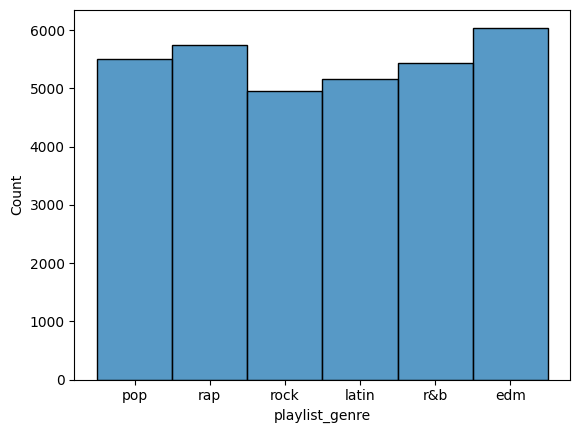

In [29]:
sns.histplot(data=df, x='playlist_genre')

<Axes: xlabel='danceability', ylabel='energy'>

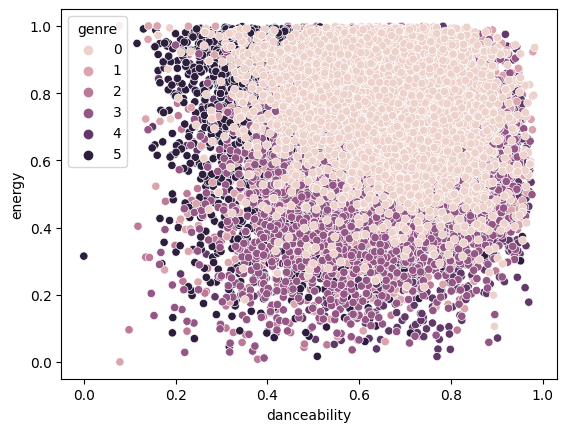

In [35]:
sns.scatterplot(data=df, x='danceability', y='energy', hue='genre')

<Axes: xlabel='genre', ylabel='loudness'>

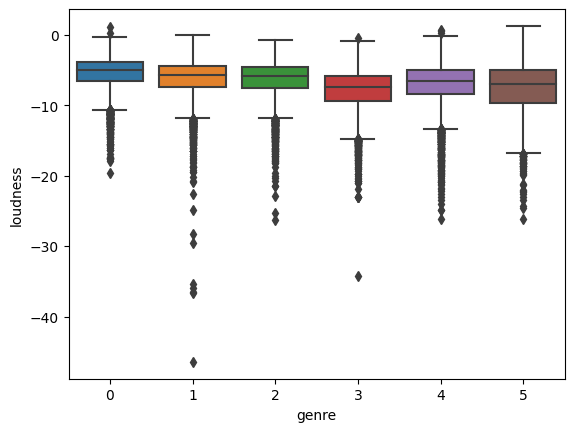

In [37]:
import seaborn as sns

sns.boxplot(x='genre', y='loudness', data=df)

<Axes: xlabel='genre', ylabel='loudness'>

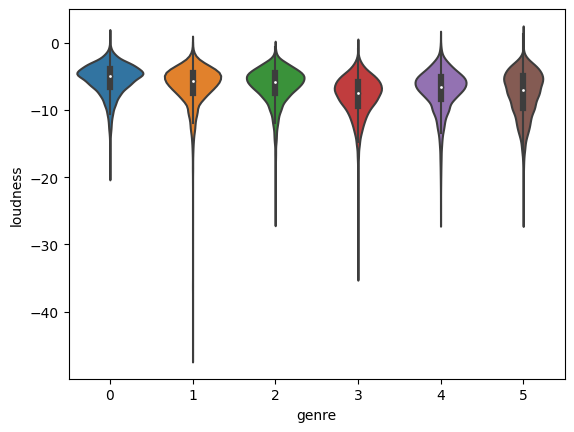

In [43]:
import seaborn as sns

sns.violinplot(x='genre', y='loudness', data=df)

Text(0.5, 1.0, 'Loudness Over Time')

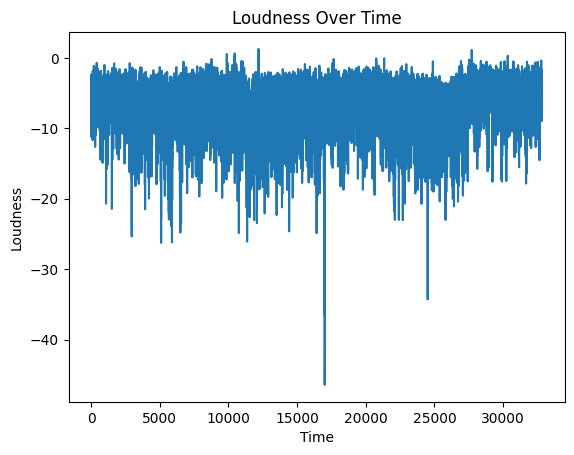

In [44]:
import matplotlib.pyplot as plt

plt.plot(df['loudness'])
plt.xlabel('Time')
plt.ylabel('Loudness')
plt.title('Loudness Over Time')

Text(0.5, 1.0, 'Top 10 Genres')

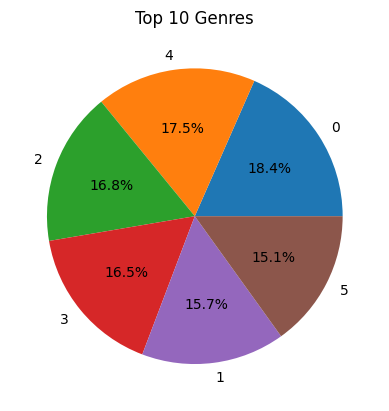

In [45]:
import matplotlib.pyplot as plt

genre_counts = df['genre'].value_counts().head(10)
plt.pie(genre_counts.values, labels=genre_counts.index, autopct='%1.1f%%')
plt.title('Top 10 Genres')

Text(0.5, 1.0, 'Distribution of Loudness')

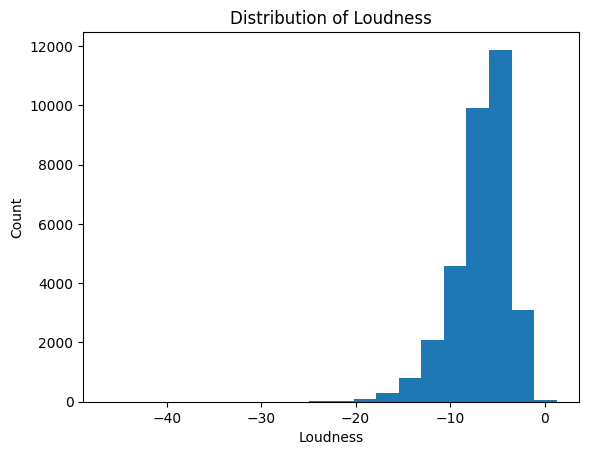

In [46]:
import matplotlib.pyplot as plt

plt.hist(df['loudness'], bins=20)
plt.xlabel('Loudness')
plt.ylabel('Count')
plt.title('Distribution of Loudness')

Text(0.5, 1.0, 'Top 10 Genres')

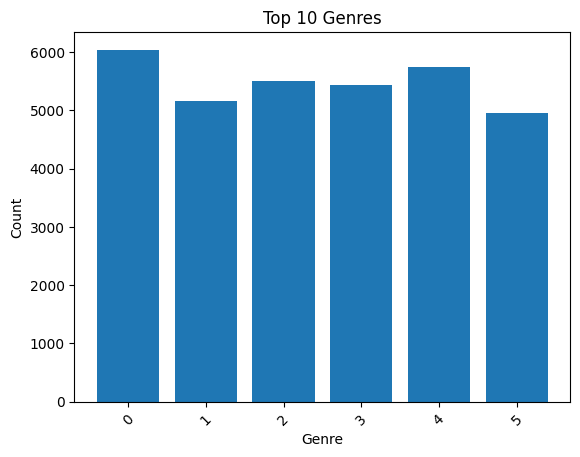

In [38]:
import matplotlib.pyplot as plt

genre_counts = df['genre'].value_counts().head(10)
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Genres')

**CORRELATION MATRIX**

<ipython-input-18-fb5bc34ddff9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

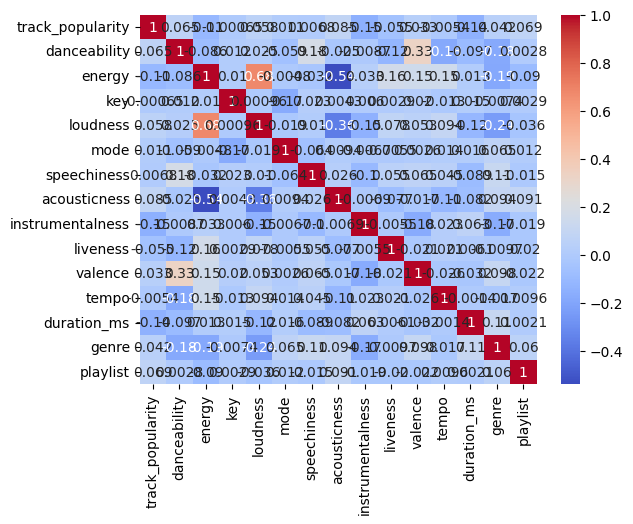

In [18]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

**K MEANS CLUSTERING**

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
labels = kmeans.predict(X)

<Axes: xlabel='genre', ylabel='playlist'>

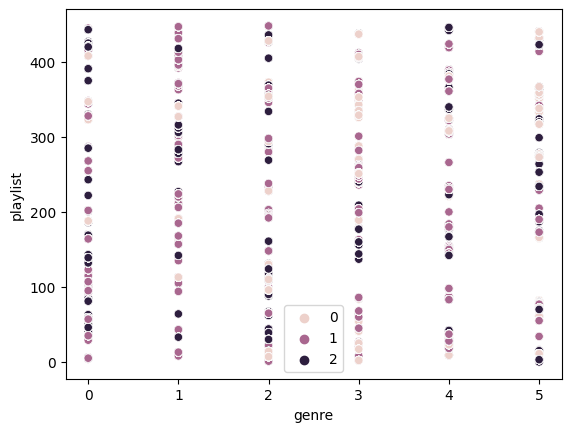

In [27]:
sns.scatterplot(data=df, x='genre', y='playlist', hue=labels)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, df['genre'], test_size=0.2)

In [25]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [26]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.43444495203289174
